In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

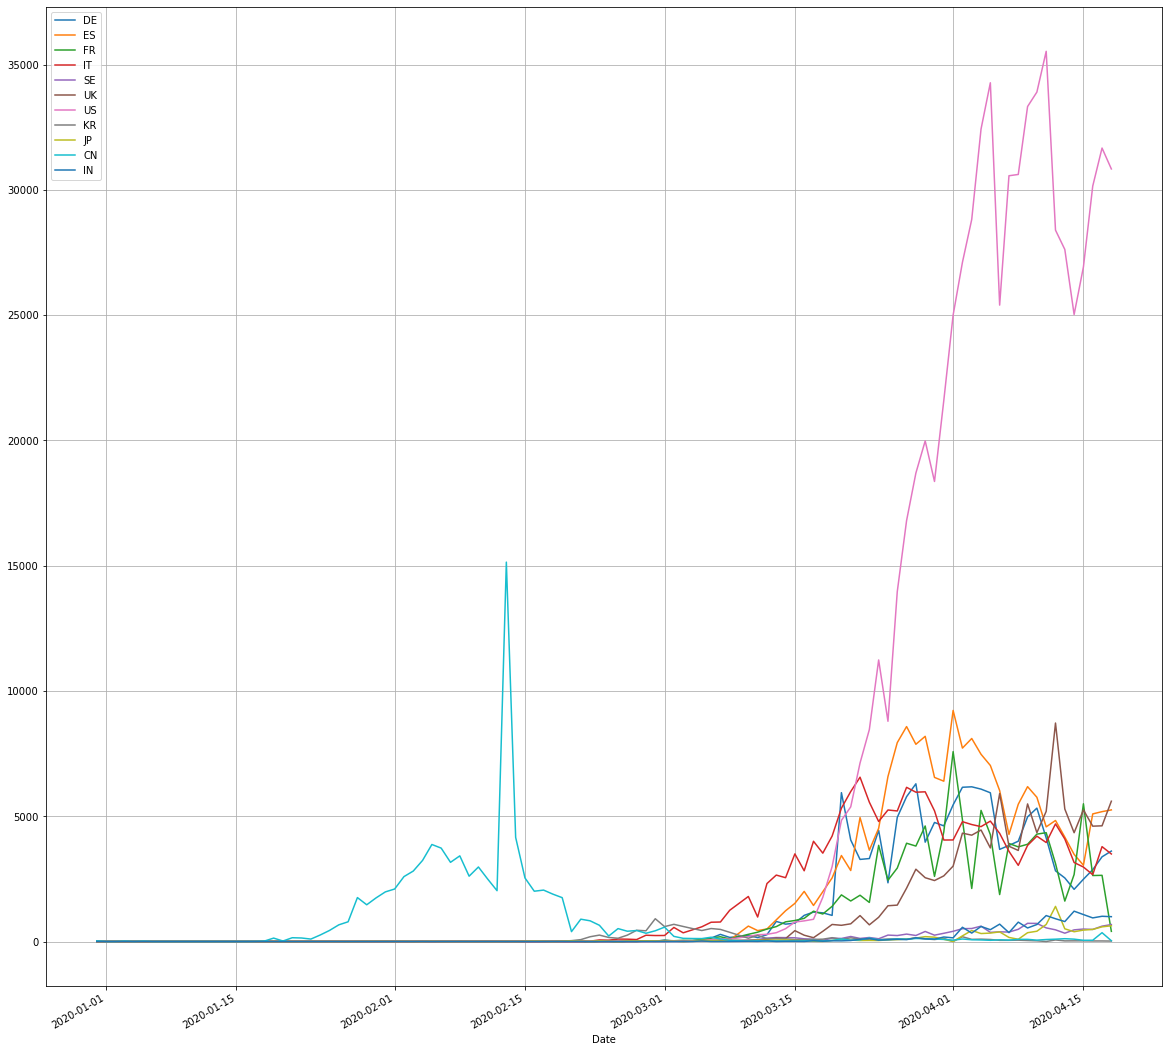

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

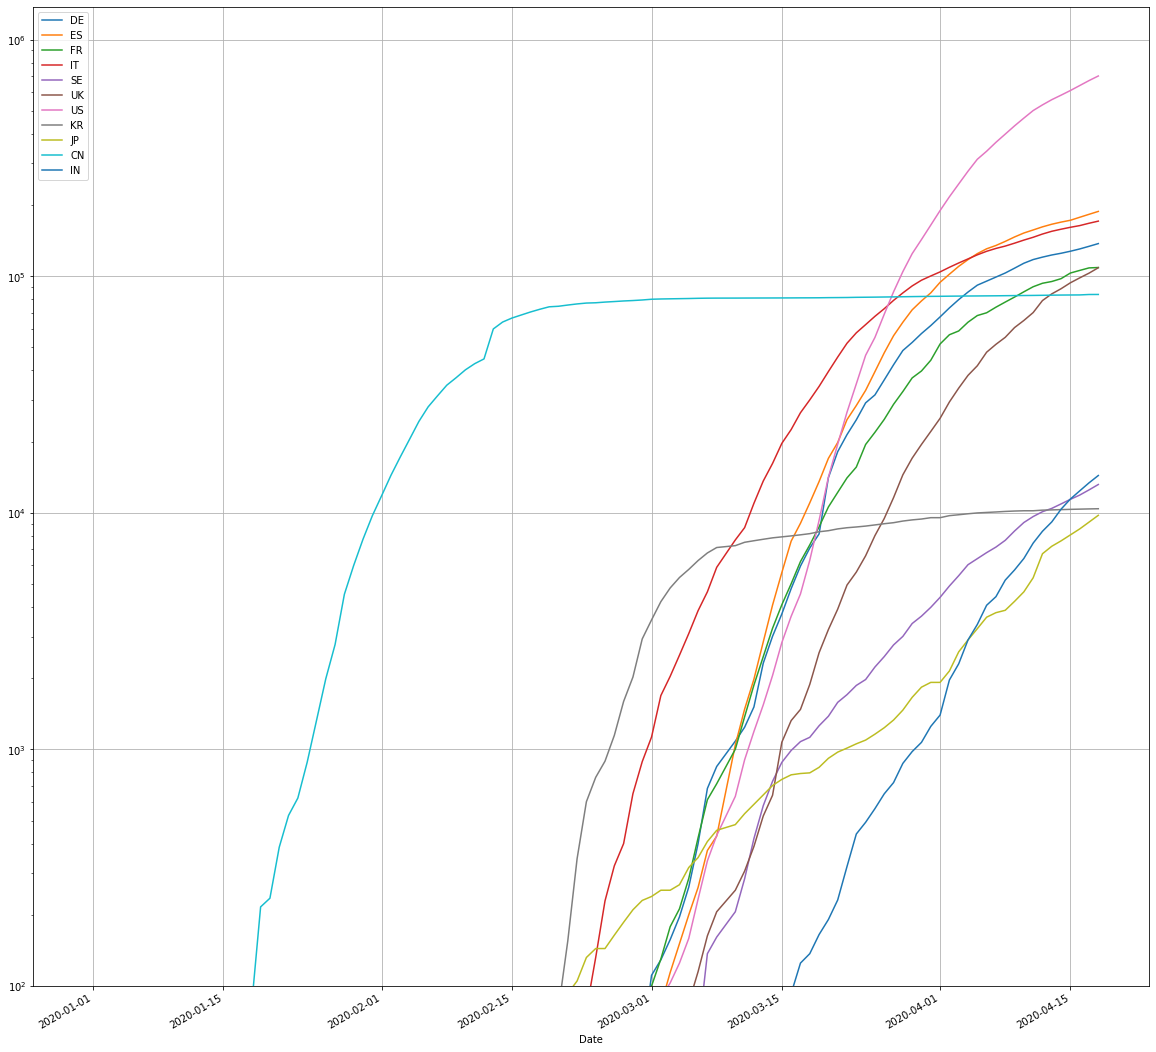

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

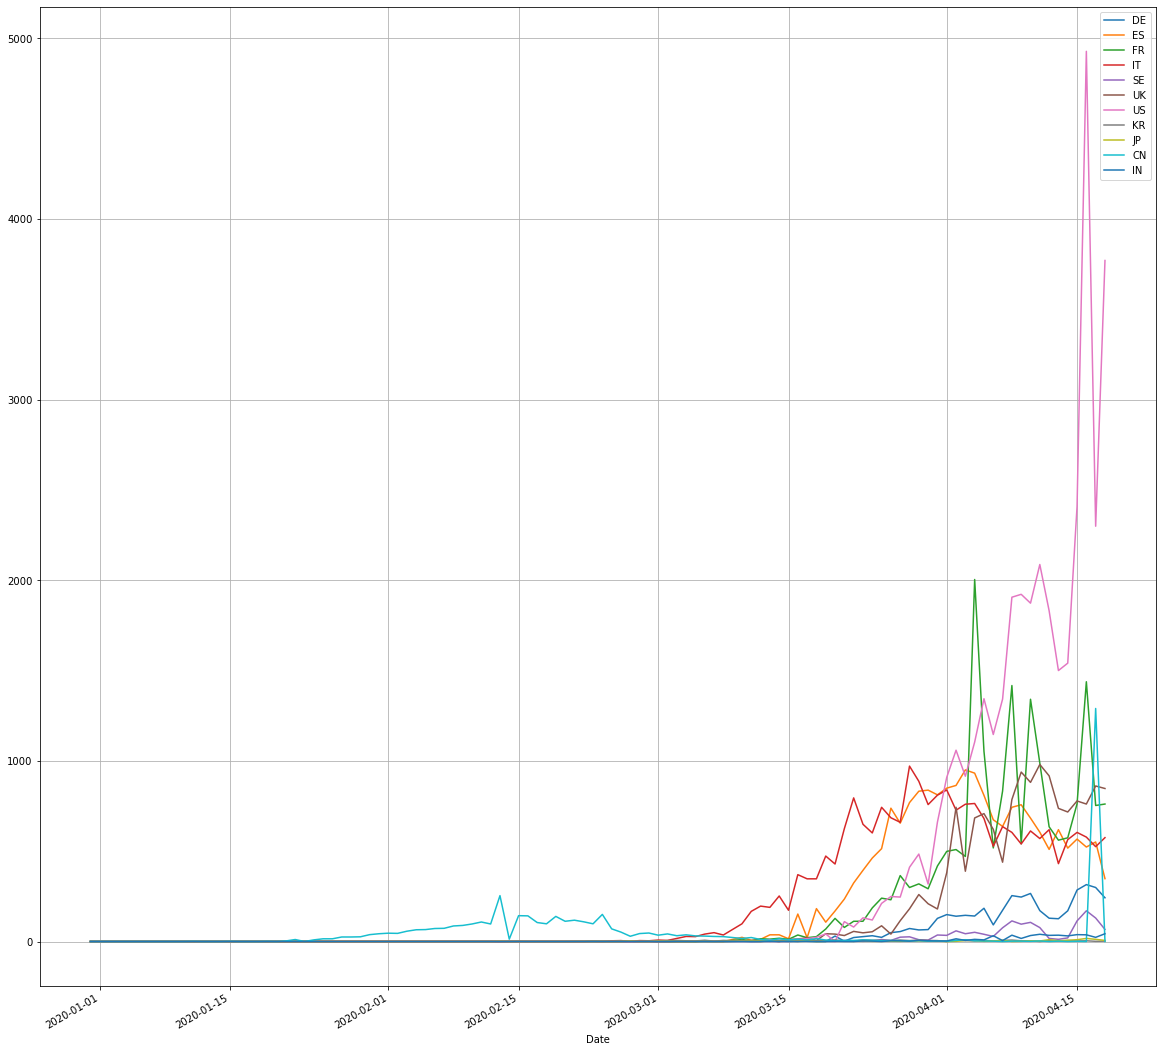

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

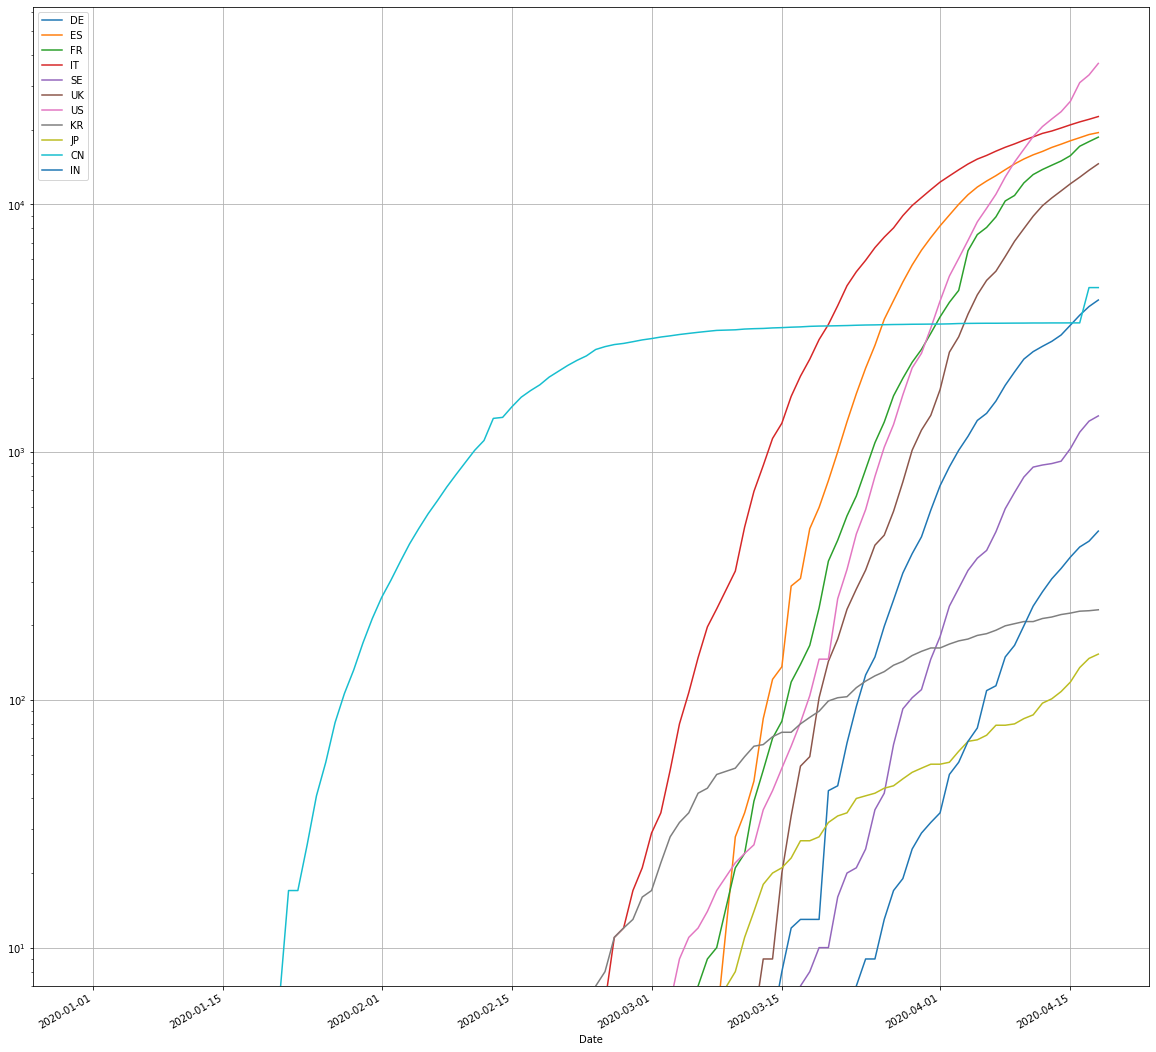

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
14,2020-04-04,6082,7472,5233,4585,612,4450,32425,94,318,62,601
13,2020-04-05,5936,7026,4267,4805,365,3735,34272,81,336,48,472
12,2020-04-06,3677,6023,1873,4316,387,5903,25398,47,383,67,693
11,2020-04-07,3834,4273,3912,3599,376,3802,30561,47,163,56,354
10,2020-04-08,4003,5478,3777,3039,487,3634,30613,53,89,86,773
9,2020-04-09,4974,6180,3881,3836,726,5491,33323,39,351,86,540
8,2020-04-10,5323,5756,4286,4204,722,4344,33901,27,410,55,678
7,2020-04-11,4133,4576,4342,3951,544,5195,35527,0,680,79,1035
6,2020-04-12,2821,4830,3114,4694,466,8719,28391,62,1401,93,909
5,2020-04-13,2537,4167,1613,4092,332,5288,27620,25,507,112,796


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-04,85723,117551,63928,118335,6036,38101,277844,9908,2902,82482,2902
2020-04-05,91659,124577,68195,123140,6401,41836,312116,9989,3238,82530,3374
2020-04-06,95336,130600,70068,127456,6788,47739,337514,10036,3621,82597,4067
2020-04-07,99170,134873,73980,131055,7164,51541,368075,10083,3784,82653,4421
2020-04-08,103173,140351,77757,134094,7651,55175,398688,10136,3873,82739,5194
2020-04-09,108147,146531,81638,137930,8377,60666,432011,10175,4224,82825,5734
2020-04-10,113470,152287,85924,142134,9099,65010,465912,10202,4634,82880,6412
2020-04-11,117603,156863,90266,146085,9643,70205,501439,10202,5314,82959,7447
2020-04-12,120424,161693,93380,150779,10109,78924,529830,10264,6715,83052,8356


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
14,2020-04-04,141,932,2004,764,51,684,1104,3,6,4,12
13,2020-04-05,184,809,1053,681,40,708,1344,6,1,3,9
12,2020-04-06,92,674,518,527,28,621,1146,3,3,2,32
11,2020-04-07,173,637,833,636,76,439,1342,6,7,0,5
10,2020-04-08,254,743,1417,604,114,786,1906,8,0,2,35
9,2020-04-09,246,757,541,540,96,938,1922,4,1,2,17
8,2020-04-10,266,683,1341,612,106,881,1873,4,4,1,33
7,2020-04-11,171,605,987,570,77,980,2087,0,3,3,40
6,2020-04-12,129,510,635,619,17,917,1831,6,10,0,34
5,2020-04-13,126,619,561,431,12,737,1500,3,4,2,35


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-04,1158,10935,6498,14548,333,3604,7153,176,68,3307,68
2020-04-05,1342,11744,7551,15229,373,4312,8497,182,69,3310,77
2020-04-06,1434,12418,8069,15756,401,4933,9643,185,72,3312,109
2020-04-07,1607,13055,8902,16392,477,5372,10985,191,79,3312,114
2020-04-08,1861,13798,10319,16996,591,6158,12891,199,79,3314,149
2020-04-09,2107,14555,10860,17536,687,7096,14813,203,80,3316,166
2020-04-10,2373,15238,12201,18148,793,7977,16686,207,84,3317,199
2020-04-11,2544,15843,13188,18718,870,8957,18773,207,87,3320,239
2020-04-12,2673,16353,13823,19337,887,9874,20604,213,97,3320,273
